# Feature Selection for Accident Dataset

Students' names:

- Anjali Sebastian

- Kruta Prabhu

- Kshama Kumar

### Setup

In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import pandas as pd
import os

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)


# to make this notebook's output stable across runs
np.random.seed(42)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "decision_trees"

IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)

os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

## Part0

- Develop a classifier using Decition Trees

    - Use two methods for criterion: Entropy and Gini

- Find important features

- Understand and implement a framework of k-cross validation

- Evaluate model performance

    - Task: Calculate the averages of k-folds

### Dataset 1: iris

#### Extract mportant features from Decition Trees

#### Important features from a decision tree

- Decision tree classifier

https://scikit-learn.org/stable/modules/tree.html#classification

- Metrics

https://scikit-learn.org/stable/modules/model_evaluation.html

#### Train-test split

- A simple way to prepare training-testing data

#### Build a decition tree (with 'entropy' method)

- Important features from a decision tree using information gain measure (entropy)

#### DT visualization

#### Build a decition tree (with 'gini' method)

- Important features from a decision tree using information gain measure (gini)

### k-cross validation

##### Construct a decision tree (default criterion: entropy)

##### k-cross validation and averge the results

### Task: Make a summary of the model performance

<p style='color:red'> 
Conduct k-cross validation and aaverage k folds' results 
</p> 

- For each fold, access performance measures stored in result_metrics_dict. 

- Currently the code shows the content of the dictionary and an example that shows how to access 'precision' measure of a class 'setosa'. 

- Calculate the averages of the following:
    - accuracy
    - precision, recall, and f1-score for each class
    - macro average of precision, recall, and f1-score
    - weighted average of precision, recall, and f1-score

### Our dataset: Us Accidents

## Part 1

The best practice is to define a classification program for the dataset(s) of your term project. 

In case a classification problem is not possibly defined for your datasets, you can use the cancer dataset in the example above. 

#### 1. Construct  a decision tree using the following parameters

- Use information gain (entropy) measure
- max_depth = 2
- Apply k=3 cross validation and print a summary of statistics (performance evaluation) for each fold


#### 2. Construct  a decision tree using the following parameters

- Use information gini measure
- max_depth = 2
- Apply k=3 cross validation and print a summary of statistics (performance evaluation) for each fold

#### 3. Performance comparisons

- Compare the performance results with those of the decision tree using Gini index measure in the above example

#### 4. For both trees, change the following parameters and observe the changes:

- The depth of tree: currently max_depth=2 in the model training step. Change the depth 3, 4, 5 and check if this affects the overall results. 

- The k value for cross validation is currently set to 3. Change k value, k = 5, 7, 10 and check if this affects the overall results. 

# START CODE

### 0. Load a subset of our project  data 

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [24]:
import descartes
import geopandas as gpd
from shapely.geometry  import Point,Polygon

In [25]:
import folium

In [26]:
df_full = pd.read_csv("../../project_data/US_accidents_full_cleaned_1.csv",)
df_sign = pd.read_csv("../../project_data/US_accidents_signs_only_cleaned_1.csv")

In [27]:
print(df_full.shape)
print(df_sign.shape)

(1370980, 30)
(391866, 30)


In [28]:
df_full.head()

,Unnamed: 0,ID,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Humidity(%),Pressure(in),...,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Sign
0,0,A-2716600,3,40.108910,-83.092860,40.112060,-83.031870,3.230,58.0,29.76,...,False,False,False,False,False,False,False,False,False,False
1,5,A-2716605,3,39.172393,-84.492792,39.170476,-84.501798,0.500,93.0,29.69,...,False,False,False,False,False,True,True,True,True,False
2,6,A-2716606,2,39.063240,-84.032430,39.067310,-84.058510,1.427,100.0,29.66,...,False,False,False,True,False,True,True,True,True,True
3,7,A-2716607,2,39.067080,-84.058550,39.063020,-84.032540,1.423,100.0,29.66,...,False,False,False,False,False,True,True,True,True,False
4,8,A-2716608,2,39.775650,-84.186030,39.772750,-84.188050,0.227,100.0,29.63,...,False,False,False,False,False,True,True,True,True,False


In [29]:
df_sign.head()

,Unnamed: 0,ID,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Humidity(%),Pressure(in),...,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Sign
0,6,A-2716606,2,39.063240,-84.032430,39.067310,-84.058510,1.427,100.0,29.66,...,False,False,False,True,False,True,True,True,True,True
1,9,A-2716609,2,41.375310,-81.820170,41.367860,-81.821740,0.521,92.0,29.63,...,False,False,False,False,False,True,True,True,True,True
2,13,A-2716613,2,39.138770,-84.533940,39.139770,-84.534300,0.072,96.0,29.69,...,False,False,False,True,False,True,True,True,True,True
3,62,A-2716662,2,41.035566,-81.569917,41.036015,-81.579895,0.521,74.0,29.79,...,False,False,False,False,False,True,True,True,True,True
4,94,A-2716694,2,41.096100,-81.585930,41.101860,-81.590010,0.451,80.0,30.08,...,False,False,False,False,False,True,True,True,True,True


### 1. Basic Pre-processing

In [30]:
df_sign['Severity'] = df_sign['Severity'].astype('category')
df_full['Severity'] = df_full['Severity'].astype('category')

In [31]:
df_sign.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 391866 entries, 0 to 391865
Data columns (total 30 columns):
 #   Column                 Non-Null Count   Dtype   
---  ------                 --------------   -----   
 0   Unnamed: 0             391866 non-null  int64   
 1   ID                     391866 non-null  object  
 2   Severity               391866 non-null  category
 3   Start_Lat              391866 non-null  float64 
 4   Start_Lng              391866 non-null  float64 
 5   End_Lat                391866 non-null  float64 
 6   End_Lng                391866 non-null  float64 
 7   Distance(mi)           391866 non-null  float64 
 8   Humidity(%)            391866 non-null  float64 
 9   Pressure(in)           391866 non-null  float64 
 10  Visibility(mi)         391866 non-null  float64 
 11  Wind_Speed(mph)        391866 non-null  float64 
 12  Amenity                391866 non-null  bool    
 13  Bump                   391866 non-null  bool    
 14  Crossing            

In [32]:
df_sign.tail()

,Unnamed: 0,ID,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Humidity(%),Pressure(in),...,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Sign
391861,1516048,A-4239391,2,33.92925,-117.41667,33.92523,-117.42377,0.493,33.0,28.93,...,False,False,False,False,False,True,True,True,True,True
391862,1516049,A-4239392,2,34.03047,-117.59817,34.03050,-117.58860,0.548,34.0,28.78,...,False,False,False,False,False,True,True,True,True,True
391863,1516052,A-4239395,2,33.85080,-117.84365,33.85075,-117.83745,0.356,50.0,29.70,...,False,False,False,False,False,True,True,True,True,True
391864,1516056,A-4239399,2,34.26103,-119.22800,34.26239,-119.23087,0.189,68.0,29.76,...,False,False,False,False,False,True,True,True,True,True
391865,1516061,A-4239404,2,33.77545,-117.84779,33.77740,-117.85727,0.561,64.0,29.74,...,False,False,False,False,False,True,True,True,True,True


In [33]:
df_full.tail()

,Unnamed: 0,ID,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Humidity(%),Pressure(in),...,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Sign
1370975,1516059,A-4239402,2,34.00248,-117.37936,33.99888,-117.37094,0.543,40.0,28.92,...,False,False,False,False,False,True,True,True,True,False
1370976,1516060,A-4239403,2,32.76696,-117.14806,32.76555,-117.15363,0.338,73.0,29.39,...,False,False,False,False,False,True,True,True,True,False
1370977,1516061,A-4239404,2,33.77545,-117.84779,33.77740,-117.85727,0.561,64.0,29.74,...,False,False,False,False,False,True,True,True,True,True
1370978,1516062,A-4239405,2,33.99246,-118.40302,33.98311,-118.39565,0.772,81.0,29.62,...,False,False,False,False,False,True,True,True,True,False
1370979,1516063,A-4239406,2,34.13393,-117.23092,34.13736,-117.23934,0.537,47.0,28.63,...,False,False,False,False,False,True,True,True,True,False


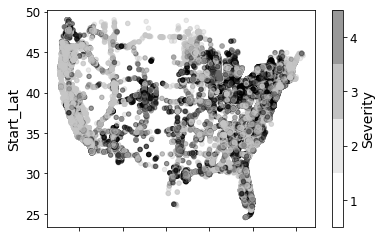

In [34]:
df_sign.plot(kind="scatter", x="Start_Lng", y="Start_Lat", c="Severity",alpha=0.4)
plt.show()

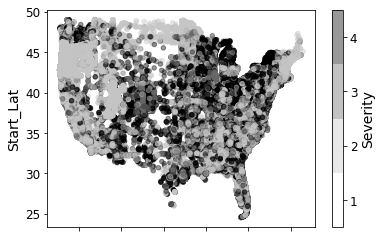

In [35]:
df_full.plot(kind="scatter", x="Start_Lng", y="Start_Lat", c="Severity",alpha=0.4)
plt.show()

In [36]:
geometry = [Point(xy) for xy in zip(df_sign["Start_Lng"],df_sign["Start_Lat"])]
geometry[:3]

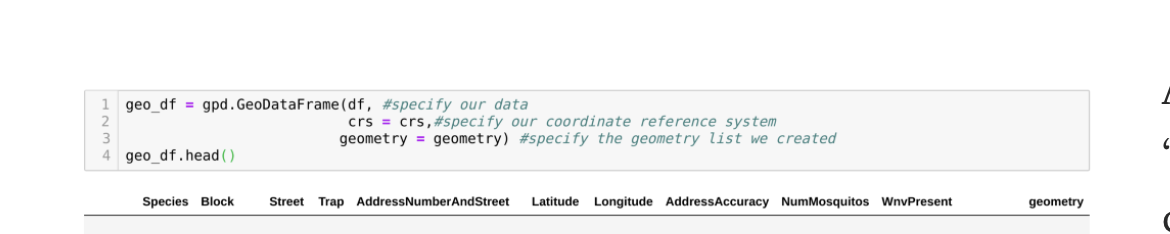

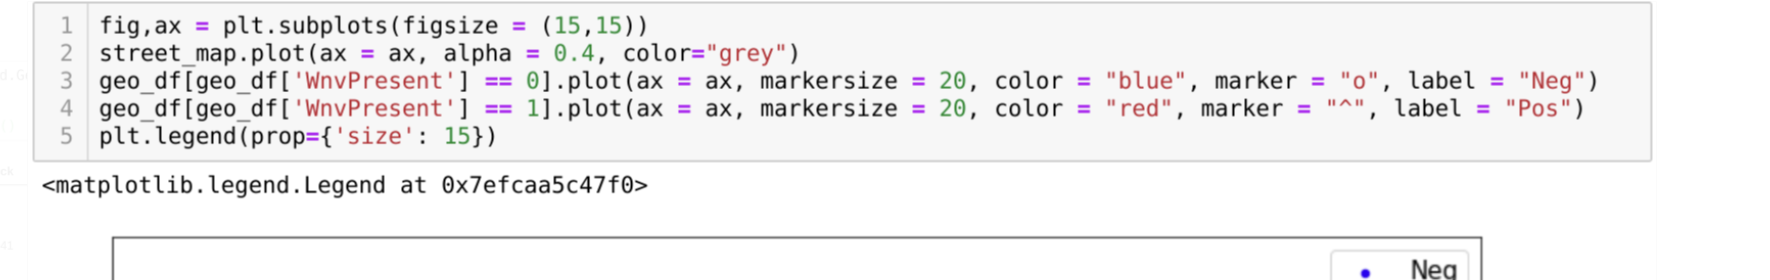

In [38]:
geo_df = gpd.GeoDataFrame(df_sign,crs="EPSG:4326", geometry = geometry)

In [39]:
# geo_df.to_csv("../../project_data/US_accident_sign_geo.csv")

<AxesSubplot:>

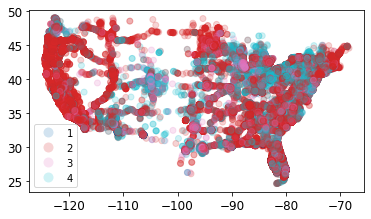

In [40]:
fig, ax = plt.subplots(1,1);
geo_df.plot(alpha = 0.2,ax=ax,legend=True, column = "Severity")

In [42]:
from mapclassify import classify

In [ ]:
geo_df.explore()

### 2. Normalize Data 

In [14]:
from sklearn.preprocessing import MinMaxScaler

In [15]:
# Using MinMax Scalar to mormalize the dataset
# only columns from 3 to 12(including) are normalized 
df_full_norm =df_full.copy(deep=True)
minmax_scaler = MinMaxScaler(feature_range=(0, 1))
df_full_norm.iloc[:,3:12] = minmax_scaler.fit_transform(df_full_norm.iloc[:,3:12])
df_full_norm.head()

,Unnamed: 0,ID,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Humidity(%),Pressure(in),...,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Sign
0,0,A-2716600,3,0.636040,0.721532,0.634239,0.722547,0.020814,0.575758,0.512582,...,False,False,False,False,False,False,False,False,False,False
1,5,A-2716605,3,0.597706,0.697137,0.595814,0.696934,0.003222,0.929293,0.511375,...,False,False,False,False,False,True,True,True,True,False
2,6,A-2716606,2,0.593238,0.705159,0.591604,0.704658,0.009195,1.000000,0.510858,...,False,False,False,True,False,True,True,True,True,True
3,7,A-2716607,2,0.593395,0.704704,0.591429,0.705110,0.009170,1.000000,0.510858,...,False,False,False,False,False,True,True,True,True,False
4,8,A-2716608,2,0.622399,0.702483,0.620392,0.702401,0.001463,1.000000,0.510341,...,False,False,False,False,False,True,True,True,True,False


In [16]:
# Using MinMax Scalar to mormalize the dataset
# only columns from 3 to 12(including) are normalized 
df_sign_norm =df_sign.copy(deep=True)
minmax_scaler = MinMaxScaler(feature_range=(0, 1))
df_sign_norm.iloc[:,3:12] = minmax_scaler.fit_transform(df_sign_norm.iloc[:,3:12])
df_sign_norm.head()

,Unnamed: 0,ID,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Humidity(%),Pressure(in),...,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Sign
0,6,A-2716606,2,0.593382,0.721594,0.593401,0.721115,0.009962,1.000000,0.486654,...,False,False,False,True,False,True,True,True,True,True
1,9,A-2716609,2,0.688050,0.761044,0.687568,0.761002,0.003637,0.919192,0.486106,...,False,False,False,False,False,True,True,True,True,True
2,13,A-2716613,2,0.596474,0.712650,0.596367,0.712631,0.000503,0.959596,0.487203,...,False,False,False,True,False,True,True,True,True,True
3,62,A-2716662,2,0.674139,0.765506,0.673985,0.765315,0.003637,0.737374,0.489031,...,False,False,False,False,False,True,True,True,True,True
4,94,A-2716694,2,0.676618,0.765221,0.676680,0.765134,0.003149,0.797980,0.494333,...,False,False,False,False,False,True,True,True,True,True


# Decision Tree Models 

### 1. Set up X and y

In [17]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [18]:
# a function to plot a bar graph of important features
def plot_feature_importances(clf, feature_names):
    c_features = len(feature_names)
    #plt.figure(figsize=(15,4))
    plt.figure(figsize=(8,8))
    plt.barh(range(c_features), clf.feature_importances_)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature name")
    plt.yticks(np.arange(c_features), feature_names)

# PART A: FEATURE ANALYSIS ON FULL DATA SET

In [ ]:
X=df_full_norm.iloc[:,3:]
y=df_full_norm.iloc[:,2] 

In [ ]:
# A simple training (1 training)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

## 1. Decision Tree with Entropy Method

Accuracy of DT classifier on training set: 1.00
Accuracy of DT classifier on test set: 0.81


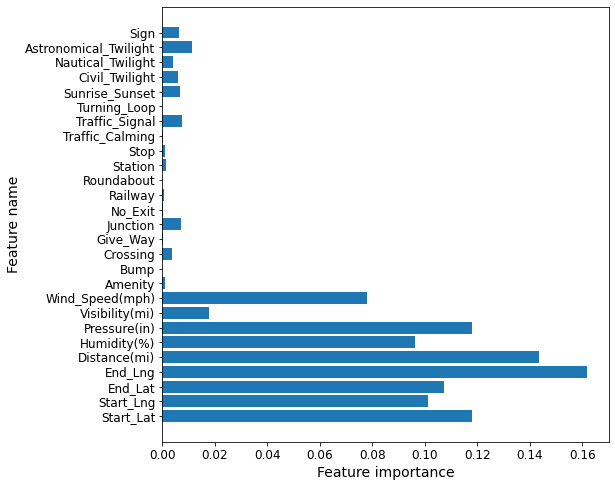

Feature importances: [1.18137814e-01 1.01179422e-01 1.07453014e-01 1.62023158e-01
 1.43649937e-01 9.63415204e-02 1.18174798e-01 1.79350009e-02
 7.78313170e-02 8.38121308e-04 3.64856915e-05 3.86074375e-03
 2.22518937e-04 6.98104226e-03 1.13824990e-04 7.77952880e-04
 3.39979985e-06 1.47264457e-03 9.26227293e-04 7.69894477e-05
 7.61255306e-03 0.00000000e+00 6.58085559e-03 6.02143910e-03
 4.05904212e-03 1.12151513e-02 6.47502570e-03]


In [21]:
clf = DecisionTreeClassifier(criterion='entropy').fit(X_train, y_train)

train_score = clf.score(X_train, y_train)
test_score = clf.score(X_test, y_test)

print('Accuracy of DT classifier on training set: {:.2f}'.format(train_score))
print('Accuracy of DT classifier on test set: {:.2f}'.format(test_score))

#plt.figure(figsize=(12,12), dpi=60)

# import features (call the function above)
plot_feature_importances(clf, X.columns)

plt.show()

print('Feature importances: {}'.format(clf.feature_importances_))

## 2. Decision Tree with Gini Method

Accuracy of DT classifier on training set: 1.00
Accuracy of DT classifier on test set: 0.81


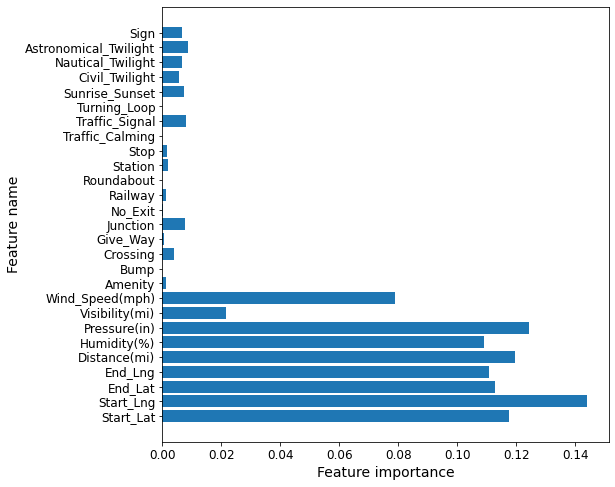

Feature importances: [1.17380787e-01 1.44108393e-01 1.12757284e-01 1.10792092e-01
 1.19430393e-01 1.09108715e-01 1.24435437e-01 2.15061372e-02
 7.87254011e-02 1.20183556e-03 5.16986443e-05 3.99672417e-03
 5.52797762e-04 7.68372151e-03 2.65496529e-04 1.18050389e-03
 5.04619881e-06 1.88658277e-03 1.61909469e-03 5.35965506e-05
 8.16337234e-03 0.00000000e+00 7.27026683e-03 5.57312139e-03
 6.74032846e-03 8.68222547e-03 6.82894729e-03]


In [24]:
clf = DecisionTreeClassifier(criterion='gini').fit(X_train, y_train)

train_score = clf.score(X_train, y_train)
test_score = clf.score(X_test, y_test)

print('Accuracy of DT classifier on training set: {:.2f}'.format(train_score))
print('Accuracy of DT classifier on test set: {:.2f}'.format(test_score))

#plt.figure(figsize=(12,12), dpi=60)

# import features (call the function above)
plot_feature_importances(clf, X.columns)

plt.show()

print('Feature importances: {}'.format(clf.feature_importances_))

## 3. Model with K-Fold Cross-validation

In [25]:
#### Setup the tree classifier

In [26]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report

#X=df_norm.iloc[:,2:]
#y=df_norm.iloc[:,1] 

targets = df_full_norm.iloc[:,2].unique().astype(str)
features = df_full_norm.iloc[:,3:].columns
X= np.c_[np.array(df_full_norm.iloc[:,3:])]
y= np.c_[np.array(df_full_norm.iloc[:,2])]

tree_clf = DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=40)

In [27]:
#### K-fold Setup

In [28]:
from sklearn.model_selection import KFold # import k-fold validation

k = 3
kf = KFold(n_splits=k, random_state=None, shuffle=True) # Define the split - into 2 folds 
kf.get_n_splits(X) # returns the number of splitting iterations in the cross-validator

3

In [31]:
c1_avg_precision = 0
c2_avg_precision = 0
c3_avg_precision = 0
c4_avg_precision = 0

c1_avg_recall = 0
c2_avg_recall = 0
c3_avg_recall = 0
c4_avg_recall = 0

c1_avg_f1 = 0
c2_avg_f1 = 0
c3_avg_f1 = 0 
c4_avg_f1 = 0 

for train_index, test_index in kf.split(X):
    #print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    tree_clf.fit(X_train, y_train)
    y_pred = tree_clf.predict(X_test)
    
    # Print classification report
    target_names = targets
    result_metrics = classification_report(y_test, y_pred, target_names=targets)
    
    print(result_metrics)
    
    # Once you get dictionary of metrics, access the values using dictionary
    result_metrics_dict = classification_report(y_test, y_pred, target_names=targets, output_dict=True)
    
    print(result_metrics_dict)
    
    # this is an example to access a measure of each class
    c1_avg_precision += result_metrics_dict['1']['precision']
    c2_avg_precision += result_metrics_dict['2']['precision']
    c3_avg_precision += result_metrics_dict['3']['precision']
    c4_avg_precision += result_metrics_dict['4']['precision']
    
    # this is an example to access a measure of each class
    c1_avg_recall += result_metrics_dict['1']['recall']
    c2_avg_recall += result_metrics_dict['2']['recall']
    c3_avg_recall += result_metrics_dict['3']['recall']
    c4_avg_recall += result_metrics_dict['4']['recall']
    
    # this is an example to access a measure of each class
    c1_avg_f1 += result_metrics_dict['1']['f1-score']
    c2_avg_f1 += result_metrics_dict['2']['f1-score']
    c3_avg_f1 += result_metrics_dict['3']['f1-score']
    c4_avg_f1 += result_metrics_dict['4']['f1-score']
    
    


/Users/anjali/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/anjali/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/anjali/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           3       0.00      0.00      0.00      9212
           2       0.81      1.00      0.89    369045
           4       0.00      0.00      0.00     46622
           1       0.00      0.00      0.00     32115

    accuracy                           0.81    456994
   macro avg       0.20      0.25      0.22    456994
weighted avg       0.65      0.81      0.72    456994



/Users/anjali/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/anjali/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/anjali/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


{'3': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 9212}, '2': {'precision': 0.8075488956091327, 'recall': 1.0, 'f1-score': 0.8935292401448357, 'support': 369045}, '4': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 46622}, '1': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 32115}, 'accuracy': 0.8075488956091327, 'macro avg': {'precision': 0.20188722390228317, 'recall': 0.25, 'f1-score': 0.22338231003620893, 'support': 456994}, 'weighted avg': {'precision': 0.6521352187995298, 'recall': 0.8075488956091327, 'f1-score': 0.7215685510734297, 'support': 456994}}


/Users/anjali/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/anjali/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/anjali/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           3       0.00      0.00      0.00      9104
           2       0.81      1.00      0.89    368490
           4       0.00      0.00      0.00     47418
           1       0.00      0.00      0.00     31981

    accuracy                           0.81    456993
   macro avg       0.20      0.25      0.22    456993
weighted avg       0.65      0.81      0.72    456993



/Users/anjali/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/anjali/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/anjali/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


{'3': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 9104}, '2': {'precision': 0.8063362020862463, 'recall': 1.0, 'f1-score': 0.8927864050501343, 'support': 368490}, '4': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 47418}, '1': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 31981}, 'accuracy': 0.8063362020862463, 'macro avg': {'precision': 0.2015840505215616, 'recall': 0.25, 'f1-score': 0.22319660126253357, 'support': 456993}, 'weighted avg': {'precision': 0.650178070794872, 'recall': 0.8063362020862463, 'f1-score': 0.7198859991223585, 'support': 456993}}


/Users/anjali/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/anjali/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/anjali/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           3       0.00      0.00      0.00      9258
           2       0.81      1.00      0.89    368296
           4       0.00      0.00      0.00     47216
           1       0.00      0.00      0.00     32223

    accuracy                           0.81    456993
   macro avg       0.20      0.25      0.22    456993
weighted avg       0.65      0.81      0.72    456993

{'3': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 9258}, '2': {'precision': 0.805911687925198, 'recall': 1.0, 'f1-score': 0.8925261332696789, 'support': 368296}, '4': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 47216}, '1': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 32223}, 'accuracy': 0.805911687925198, 'macro avg': {'precision': 0.2014779219812995, 'recall': 0.25, 'f1-score': 0.22313153331741972, 'support': 456993}, 'weighted avg': {'precision': 0.6494936487344417, 'recall': 0.805911687925198, 'f1-score

/Users/anjali/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/anjali/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/anjali/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [33]:
print('\n class 1: ', c1_avg_precision/k)
print('\n class 2: ', c2_avg_precision/k)
print('\n class 3: ', c3_avg_precision/k)
print('\n class 4: ', c4_avg_precision/k)


 class 1:  0.0

 class 2:  0.8065989285401924

 class 3:  0.0

 class 4:  0.0


In [34]:
print('\n class 1: ', c1_avg_recall/k)
print('\n class 2: ', c2_avg_recall/k)
print('\n class 3: ', c3_avg_recall/k)
print('\n class 4: ', c4_avg_recall/k)


 class 1:  0.0

 class 2:  1.0

 class 3:  0.0

 class 4:  0.0


In [35]:
print('\n class 1: ', c1_avg_f1/k)
print('\n class 2: ', c2_avg_f1/k)
print('\n class 3: ', c3_avg_f1/k)
print('\n class 4: ', c4_avg_f1/k)


 class 1:  0.0

 class 2:  0.8929472594882163

 class 3:  0.0

 class 4:  0.0


# PART B: FEATURE ANALYSIS ON DATA THAT HAS SIGNS

In [36]:
X=df_sign_norm.iloc[:,3:]
y=df_sign_norm.iloc[:,2] 

In [37]:
# A simple training (1 training)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

### 1. Decision Tree with Entropy 

Accuracy of DT classifier on training set: 1.00
Accuracy of DT classifier on test set: 0.80


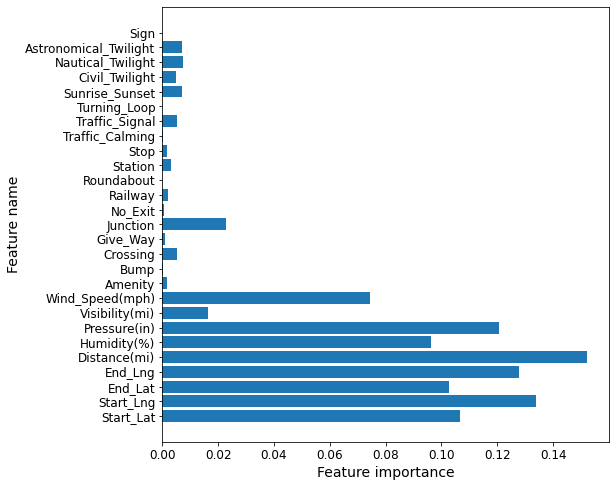

Feature importances: [1.06765438e-01 1.33865784e-01 1.02614597e-01 1.27628192e-01
 1.52300982e-01 9.60999893e-02 1.20495565e-01 1.63755668e-02
 7.45174281e-02 1.70256500e-03 7.24120927e-05 5.09572627e-03
 8.75998073e-04 2.27138602e-02 5.02940132e-04 1.91281146e-03
 0.00000000e+00 2.93594701e-03 1.70180451e-03 1.91106526e-04
 5.23684949e-03 0.00000000e+00 7.17942886e-03 4.80770277e-03
 7.22955933e-03 7.17774648e-03 0.00000000e+00]


In [38]:
clf = DecisionTreeClassifier(criterion='entropy').fit(X_train, y_train)

train_score = clf.score(X_train, y_train)
test_score = clf.score(X_test, y_test)

print('Accuracy of DT classifier on training set: {:.2f}'.format(train_score))
print('Accuracy of DT classifier on test set: {:.2f}'.format(test_score))

#plt.figure(figsize=(12,12), dpi=60)

# import features (call the function above)
plot_feature_importances(clf, X.columns)

plt.show()

print('Feature importances: {}'.format(clf.feature_importances_))

### 2. Decision Tree with Gini

Accuracy of DT classifier on training set: 1.00
Accuracy of DT classifier on test set: 0.79


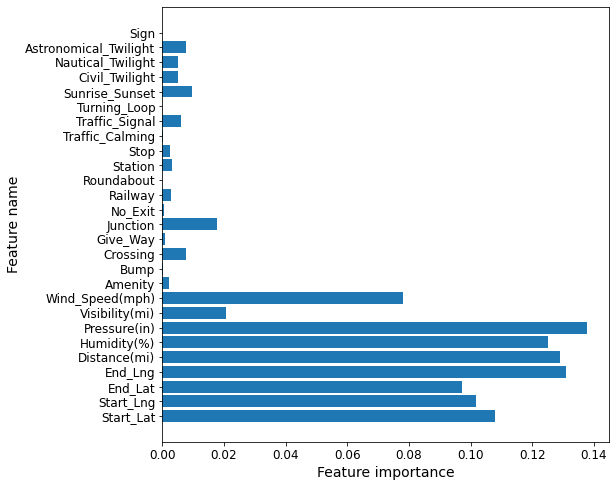

Feature importances: [1.07819348e-01 1.01627930e-01 9.72662163e-02 1.31046038e-01
 1.28977777e-01 1.25208928e-01 1.37885327e-01 2.07662275e-02
 7.80795432e-02 2.15492311e-03 1.07482116e-04 7.55408128e-03
 8.60515336e-04 1.76049073e-02 6.92483832e-04 2.68782688e-03
 1.21590600e-05 3.26776555e-03 2.44139109e-03 2.87784623e-04
 6.11342620e-03 0.00000000e+00 9.52573134e-03 5.18799198e-03
 5.13387116e-03 7.69032494e-03 0.00000000e+00]


In [39]:
clf = DecisionTreeClassifier(criterion='gini').fit(X_train, y_train)

train_score = clf.score(X_train, y_train)
test_score = clf.score(X_test, y_test)

print('Accuracy of DT classifier on training set: {:.2f}'.format(train_score))
print('Accuracy of DT classifier on test set: {:.2f}'.format(test_score))

#plt.figure(figsize=(12,12), dpi=60)

# import features (call the function above)
plot_feature_importances(clf, X.columns)

plt.show()

print('Feature importances: {}'.format(clf.feature_importances_))

## 3. Model with K-Fold Cross-validation

In [42]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report

#X=df_norm.iloc[:,2:]
#y=df_norm.iloc[:,1] 

targets = df_sign_norm.iloc[:,2].unique().astype(str)
features = df_sign_norm.iloc[:,3:].columns
X= np.c_[np.array(df_sign_norm.iloc[:,3:])]
y= np.c_[np.array(df_sign_norm.iloc[:,2])]

tree_clf = DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=40)

In [43]:
#### K-fold Setup

from sklearn.model_selection import KFold # import k-fold validation

k = 3
kf = KFold(n_splits=k, random_state=None, shuffle=True) # Define the split - into 2 folds 
kf.get_n_splits(X) # returns the number of splitting iterations in the cross-validator

3

In [44]:
c1_avg_precision = 0
c2_avg_precision = 0
c3_avg_precision = 0
c4_avg_precision = 0

c1_avg_recall = 0
c2_avg_recall = 0
c3_avg_recall = 0
c4_avg_recall = 0

c1_avg_f1 = 0
c2_avg_f1 = 0
c3_avg_f1 = 0 
c4_avg_f1 = 0 

for train_index, test_index in kf.split(X):
    #print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    tree_clf.fit(X_train, y_train)
    y_pred = tree_clf.predict(X_test)
    
    # Print classification report
    target_names = targets
    result_metrics = classification_report(y_test, y_pred, target_names=targets)
    
    print(result_metrics)
    
    # Once you get dictionary of metrics, access the values using dictionary
    result_metrics_dict = classification_report(y_test, y_pred, target_names=targets, output_dict=True)
    
    print(result_metrics_dict)
    
    # this is an example to access a measure of each class
    c1_avg_precision += result_metrics_dict['1']['precision']
    c2_avg_precision += result_metrics_dict['2']['precision']
    c3_avg_precision += result_metrics_dict['3']['precision']
    c4_avg_precision += result_metrics_dict['4']['precision']
    
    # this is an example to access a measure of each class
    c1_avg_recall += result_metrics_dict['1']['recall']
    c2_avg_recall += result_metrics_dict['2']['recall']
    c3_avg_recall += result_metrics_dict['3']['recall']
    c4_avg_recall += result_metrics_dict['4']['recall']
    
    # this is an example to access a measure of each class
    c1_avg_f1 += result_metrics_dict['1']['f1-score']
    c2_avg_f1 += result_metrics_dict['2']['f1-score']
    c3_avg_f1 += result_metrics_dict['3']['f1-score']
    c4_avg_f1 += result_metrics_dict['4']['f1-score']

/Users/anjali/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/anjali/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/anjali/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/anjali/op

              precision    recall  f1-score   support

           2       0.00      0.00      0.00      5289
           3       0.78      1.00      0.87    101537
           4       0.00      0.00      0.00     15407
           1       0.00      0.00      0.00      8389

    accuracy                           0.78    130622
   macro avg       0.19      0.25      0.22    130622
weighted avg       0.60      0.78      0.68    130622

{'2': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 5289}, '3': {'precision': 0.7773345990721318, 'recall': 1.0, 'f1-score': 0.8747194810453182, 'support': 101537}, '4': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 15407}, '1': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 8389}, 'accuracy': 0.7773345990721318, 'macro avg': {'precision': 0.19433364976803294, 'recall': 0.25, 'f1-score': 0.21867987026132954, 'support': 130622}, 'weighted avg': {'precision': 0.6042490789146319, 'recall': 0.7773345990721318, 'f1-sc

/Users/anjali/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/anjali/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/anjali/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/anjali/op

              precision    recall  f1-score   support

           2       0.00      0.00      0.00      5320
           3       0.78      1.00      0.87    101388
           4       0.00      0.00      0.00     15407
           1       0.00      0.00      0.00      8507

    accuracy                           0.78    130622
   macro avg       0.19      0.25      0.22    130622
weighted avg       0.60      0.78      0.68    130622

{'2': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 5320}, '3': {'precision': 0.7761939030178684, 'recall': 1.0, 'f1-score': 0.8739968104823068, 'support': 101388}, '4': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 15407}, '1': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 8507}, 'accuracy': 0.7761939030178684, 'macro avg': {'precision': 0.1940484757544671, 'recall': 0.25, 'f1-score': 0.2184992026205767, 'support': 130622}, 'weighted avg': {'precision': 0.6024769750821121, 'recall': 0.7761939030178684, 'f1-scor

/Users/anjali/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/anjali/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/anjali/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/anjali/op

In [45]:
print('\n class 1: ', c1_avg_precision/k)
print('\n class 2: ', c2_avg_precision/k)
print('\n class 3: ', c3_avg_precision/k)
print('\n class 4: ', c4_avg_precision/k)


 class 1:  0.0

 class 2:  0.0

 class 3:  0.7769160886629614

 class 4:  0.0


In [46]:
print('\n class 1: ', c1_avg_recall/k)
print('\n class 2: ', c2_avg_recall/k)
print('\n class 3: ', c3_avg_recall/k)
print('\n class 4: ', c4_avg_recall/k)


 class 1:  0.0

 class 2:  0.0

 class 3:  1.0

 class 4:  0.0


In [47]:
print('\n class 1: ', c1_avg_f1/k)
print('\n class 2: ', c2_avg_f1/k)
print('\n class 3: ', c3_avg_f1/k)
print('\n class 4: ', c4_avg_f1/k)


 class 1:  0.0

 class 2:  0.0

 class 3:  0.8744543541657893

 class 4:  0.0


### Part2

Write a summary in Canvas. 